<a href="https://colab.research.google.com/github/dhimasyp/PRAKTIKUM_ML_120-255/blob/Anisa/Modul2_Keg2_ML_Anisa120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anisaanggra","key":"13d6327a70641db9e15363d4b94800af"}'}

In [2]:
!ls -lha 'kaggle.json'

-rw-r--r-- 1 root root 67 Nov 10 08:17 kaggle.json


In [3]:
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download denizkavi1/brain-tumor


 99% 692M/700M [00:05<00:00, 156MB/s]
100% 700M/700M [00:05<00:00, 138MB/s]


In [6]:
import os
import zipfile

local_zip = '/content/brain-tumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/brain-tumor')
zip_ref.close()

In [7]:
check_dir = "/tmp/brain-tumor"
print(os.listdir(check_dir))

['3', '2', '1']


In [8]:
!pip install split_folders
import splitfolders

src = "/tmp/brain-tumor"
base_dir = '/content/brain-tumor/model_brain_tumor'

splitfolders.ratio(src, output = base_dir, seed=1337, ratio=(0.7,0.3))

Copying files: 3064 files [00:02, 1310.81 files/s]


In [9]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

meningioma_training_dir = os.path.join(train_dir, '1')
glioma_training_dir = os.path.join(train_dir, '2')
pituitary_training_dir = os.path.join(train_dir, '3')

meningioma_validation_dir = os.path.join(validation_dir, '1')
glioma_validation_dir = os.path.join(validation_dir, '2')
pituitary_validation_dir = os.path.join(validation_dir, '3')

In [10]:
print('total training meningioma images :', len(os.listdir(meningioma_training_dir)))
print('total training glioma images:', len(os.listdir(glioma_training_dir)))
print('total training pituitary images:', len(os.listdir(pituitary_training_dir)))
print('total validation meningioma images:', len(os.listdir(meningioma_validation_dir)))
print('total validation glioma images:', len(os.listdir(glioma_validation_dir)))
print('total validation pituitary images:', len(os.listdir(pituitary_validation_dir)))

total training meningioma images : 495
total training glioma images: 998
total training pituitary images: 651
total validation meningioma images: 213
total validation glioma images: 428
total validation pituitary images: 279


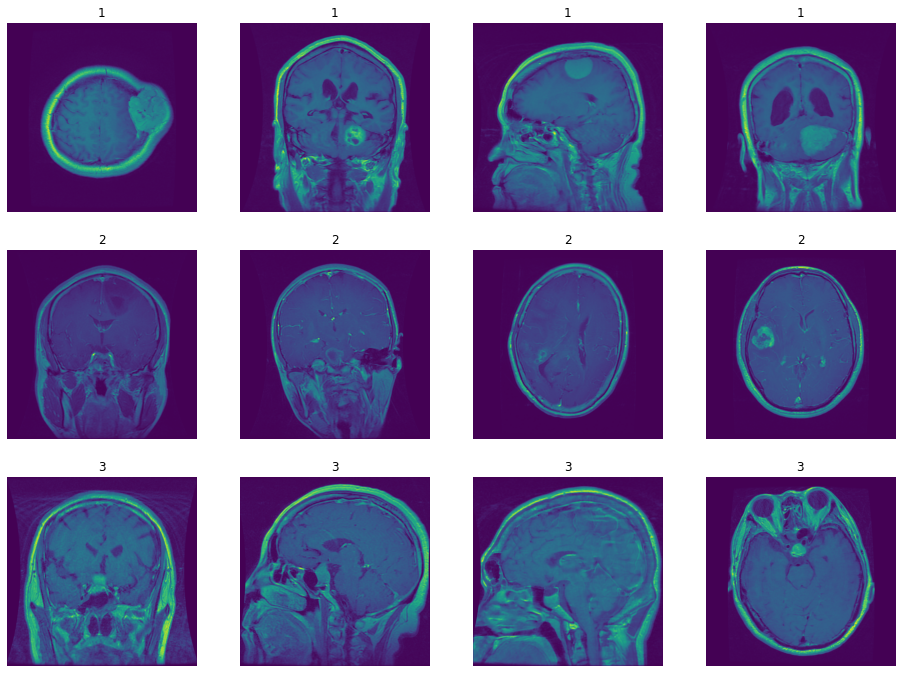

In [11]:
# 1.4 Menampilkan 4 image per label beserta judul label dengan ukuran 2 baris x 4 kolom
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4 
ncols = 4 

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_meningioma_pix = [os.path.join(meningioma_training_dir, fname) 
                for fname in os.listdir(meningioma_training_dir)[pic_index-4:pic_index]]
next_gluima_pix = [os.path.join(glioma_training_dir, fname) 
                for fname in os.listdir(glioma_training_dir)[pic_index-4:pic_index]]
next_pituitary_pix = [os.path.join(pituitary_training_dir, fname) 
                for fname in os.listdir(pituitary_training_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_meningioma_pix+next_gluima_pix+next_pituitary_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img) 
  plt.title(img_path.split(os.path.sep)[-2]) 

plt.show()


In [12]:
# Tulis Kode Anda Disini
# 2.1 Gather Data Train ukuran gambar 250 x 250 (mengubah ukuran gambar)
import cv2
import numpy as np

train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [13]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [14]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Testing Data = ", val_data.shape)
print("Testing Label = ", val_label.shape)

Train Data =  (2144, 250, 250, 3)
Train Label =  (2144,)
Testing Data =  (920, 250, 250, 3)
Testing Label =  (920,)


In [15]:
# 2.3 Normalisasi dataset, membuat dan menampilkan hasil dari label encoder
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data setelah di-normalisasi  [0.32941177 0.00392157 0.26666668]


In [16]:
# 2.3 Transformasi Label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[:5])#data ke 5

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[:5])
print()
print("Label sebelum di-encoder ", train_label[-5:])
print("Label setelah di-encoder ", y_train[-5:])

Label sebelum di-encoder  ['3' '3' '3' '3' '3']
Label setelah di-encoder  [2 2 2 2 2]

Label sebelum di-encoder  ['1' '1' '1' '1' '1']
Label setelah di-encoder  [0 0 0 0 0]


In [17]:
# Tulis Kode Anda Disini
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, ZeroPadding2D, Softmax, GlobalAveragePooling2D


In [29]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(ZeroPadding2D(padding=(2,2)))
model.add(Conv2D(16, (5, 5), strides=(3,3), activation='relu'))
model.add(ZeroPadding2D((2, 2)))
model.add(Conv2D(32, (3, 3), strides=(1,1), activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu'))
model.add(Flatten())

In [30]:
# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_6 (ZeroPaddi  (None, 254, 254, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 84, 84, 16)        1216      
                                                                 
 zero_padding2d_7 (ZeroPaddi  (None, 88, 88, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_7 (Conv2D)           (None, 86, 86, 32)        4640      
                                                                 
 zero_padding2d_8 (ZeroPaddi  (None, 88, 88, 32)       0         
 ng2D)                                                           
                                                      

In [31]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
H = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val, y_val))


Epoch 1/15
67/67 [==============================] - 165s 2s/step - loss: -594082332672.0000 - acc: 0.4655 - val_loss: -833559330816.0000 - val_acc: 0.4652
Epoch 2/15
67/67 [==============================] - 159s 2s/step - loss: -1209775947776.0000 - acc: 0.4655 - val_loss: -1660893790208.0000 - val_acc: 0.4652
Epoch 3/15
67/67 [==============================] - 158s 2s/step - loss: -2254252802048.0000 - acc: 0.4655 - val_loss: -2901084995584.0000 - val_acc: 0.4652
Epoch 4/15
67/67 [==============================] - 157s 2s/step - loss: -3874460532736.0000 - acc: 0.4655 - val_loss: -4861302145024.0000 - val_acc: 0.4652
Epoch 5/15
67/67 [==============================] - 157s 2s/step - loss: -6256162504704.0000 - acc: 0.4655 - val_loss: -7808758054912.0000 - val_acc: 0.4652
Epoch 6/15
67/67 [==============================] - 161s 2s/step - loss: -9673545613312.0000 - acc: 0.4655 - val_loss: -11578361511936.0000 - val_acc: 0.4652
Epoch 7/15
67/67 [==============================] - 157s 2s

In [35]:
# Feature Extraction Layer 
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())

In [36]:
# Fully Connected Layer
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 125, 125, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 63, 63, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 32, 32, 64)      

In [37]:
# Compile model
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
H = model2.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val, y_val))


Epoch 1/15
67/67 [==============================] - 130s 2s/step - loss: -1616935040.0000 - acc: 0.4655 - val_loss: -1800099584.0000 - val_acc: 0.4652
Epoch 2/15
67/67 [==============================] - 128s 2s/step - loss: -2133341824.0000 - acc: 0.4655 - val_loss: -2368938240.0000 - val_acc: 0.4652
Epoch 3/15
67/67 [==============================] - 128s 2s/step - loss: -2764158720.0000 - acc: 0.4655 - val_loss: -3053321216.0000 - val_acc: 0.4652
Epoch 4/15
67/67 [==============================] - 127s 2s/step - loss: -3538478336.0000 - acc: 0.4655 - val_loss: -3851537920.0000 - val_acc: 0.4652
Epoch 5/15
67/67 [==============================] - 127s 2s/step - loss: -4467185664.0000 - acc: 0.4655 - val_loss: -4812271616.0000 - val_acc: 0.4652
Epoch 6/15
67/67 [==============================] - 129s 2s/step - loss: -5522138112.0000 - acc: 0.4655 - val_loss: -5996255744.0000 - val_acc: 0.4652
Epoch 7/15
67/67 [==============================] - 127s 2s/step - loss: -6753555968.0000 - ac

In [40]:
model.save('model.h5')